In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
sales=pd.read_csv(r"C:\Users\mdimr\Downloads\sales (2).csv")

In [174]:
sales

,Unnamed: 0,prod_id,qty,price,discount,member,txn_id,start_txn_time
0,0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296
1,1,5d267b,4,40,17,t,54f307,2021-02-13 01:59:43.296
2,2,b9a74d,4,17,17,t,54f307,2021-02-13 01:59:43.296
3,3,2feb6b,2,29,17,t,54f307,2021-02-13 01:59:43.296
4,4,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.3456
...,...,...,...,...,...,...,...,...
15090,15090,9ec847,1,54,13,t,f15ab3,2021-03-20 12:01:22.944
15091,15091,2a2353,3,57,13,t,f15ab3,2021-03-20 12:01:22.944
15092,15092,e83aa3,5,32,1,t,93620b,2021-03-01 07:11:24.6624
15093,15093,d5e9a6,2,23,1,t,93620b,2021-03-01 07:11:24.6624


In [175]:
sales.drop(columns='Unnamed: 0', inplace=True)

In [176]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15095 entries, 0 to 15094
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prod_id         15095 non-null  object
 1   qty             15095 non-null  int64 
 2   price           15095 non-null  int64 
 3   discount        15095 non-null  int64 
 4   member          15095 non-null  object
 5   txn_id          15095 non-null  object
 6   start_txn_time  15095 non-null  object
dtypes: int64(3), object(4)
memory usage: 825.6+ KB


In [177]:
product=pd.read_csv(r"C:\Users\mdimr\Downloads\product_details.csv")

In [178]:
product.drop(columns='Unnamed: 0', inplace=True)

In [179]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     12 non-null     object
 1   price          12 non-null     int64 
 2   product_name   12 non-null     object
 3   category_id    12 non-null     int64 
 4   segment_id     12 non-null     int64 
 5   style_id       12 non-null     int64 
 6   category_name  12 non-null     object
 7   segment_name   12 non-null     object
 8   style_name     12 non-null     object
dtypes: int64(4), object(5)
memory usage: 996.0+ bytes


In [180]:
hierarchy=pd.read_csv(r"C:\Users\mdimr\Downloads\product_hierarchy.csv")

In [181]:
hierarchy.drop(columns='Unnamed: 0', inplace=True)

In [182]:
hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18 non-null     int64  
 1   parent_id   16 non-null     float64
 2   level_text  18 non-null     object 
 3   level_name  18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 708.0+ bytes


In [183]:
prices=pd.read_csv(r"C:\Users\mdimr\Downloads\product_prices.csv")

In [184]:
prices.drop(columns='Unnamed: 0', inplace=True)

In [185]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12 non-null     int64 
 1   product_id  12 non-null     object
 2   price       12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


# High Level Sales Analysis

## 1.What was the total quantity sold for all products?

In [186]:
df = pd.merge(sales, product, left_on='prod_id',
                  right_on='product_id', how='inner')

In [187]:
df.groupby('product_name')['qty'].sum()

product_name
Black Straight Jeans - Womens       3786
Blue Polo Shirt - Mens              3819
Cream Relaxed Jeans - Womens        3707
Grey Fashion Jacket - Womens        3876
Indigo Rain Jacket - Womens         3757
Khaki Suit Jacket - Womens          3752
Navy Oversized Jeans - Womens       3856
Navy Solid Socks - Mens             3792
Pink Fluro Polkadot Socks - Mens    3770
Teal Button Up Shirt - Mens         3646
White Striped Socks - Mens          3655
White Tee Shirt - Mens              3800
Name: qty, dtype: int64

In [189]:
df.groupby('product_name')['qty'].sum().sum()

45216

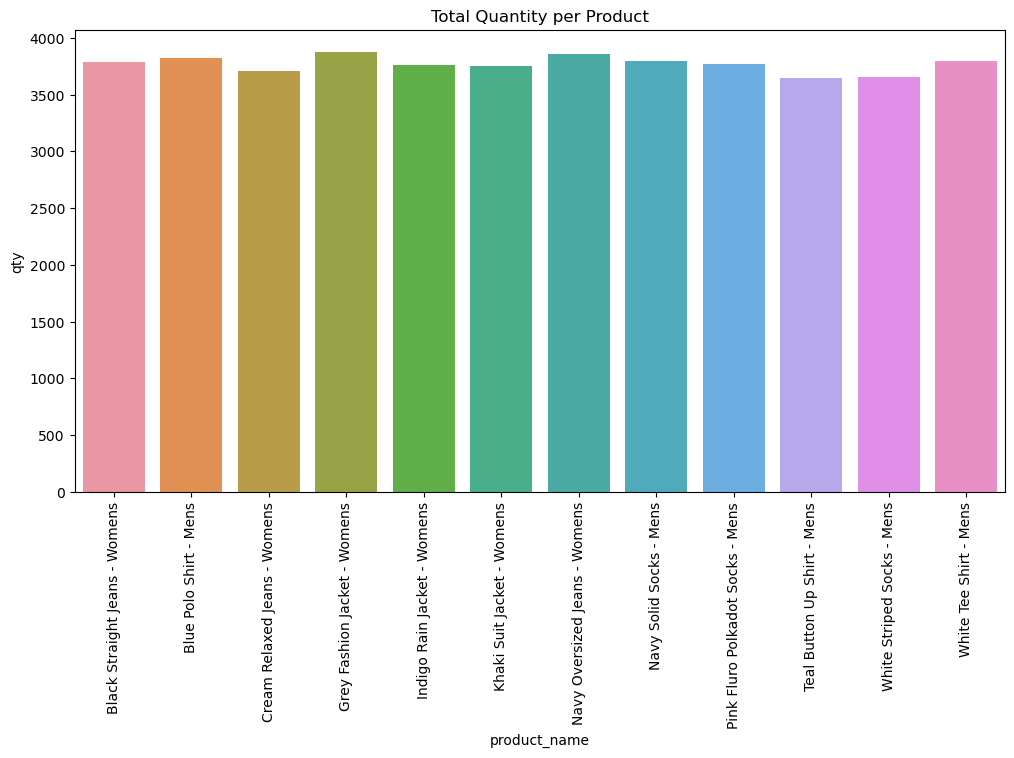

In [19]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby('product_name')['qty'].sum().index, y=df.groupby('product_name')['qty'].sum())
plt.xticks(rotation=90)
plt.title('Total Quantity per Product')
plt.show()


## Insights 
* **Frequency of Entries**:
* The height of each bar represents the count of entries for a specific product, offering a quick overview of the dataset's distribution.
* **Product Identification**:
* Products are identified on the x-axis, and the corresponding bar height indicates the number of times each product appears in the dataset.
* **Entry Comparison**:
* Products with taller bars have a higher frequency of entries, indicating their prevalence in the dataset.
* **Visual Clarity**:
* The rotation of product names on the x-axis (rotated by 90 degrees) ensures better readability, especially when dealing with a large number of products.
* **Identifying Prominent Products** :
* Products with higher counts may be considered more prominent or frequently encountered, impacting data analysis and decision-making.
   * **Navy Oversized Jeans - Womens** has higher counts more prominent or frequently encountered
   * **Teal Button Up Shirt - Mens** has lowes counts having less prominent 

## 2. What is the total generated revenue for all products before discounts?


In [191]:
sales['revenue'] = sales['price'] * sales['qty']
total_revenue_before_discounts = sales['revenue'].sum()

print("Total generated revenue for all products before discounts:", total_revenue_before_discounts)


Total generated revenue for all products before discounts: 1289453


In [192]:
sales

,prod_id,qty,price,discount,member,txn_id,start_txn_time,revenue
0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296,52
1,5d267b,4,40,17,t,54f307,2021-02-13 01:59:43.296,160
2,b9a74d,4,17,17,t,54f307,2021-02-13 01:59:43.296,68
3,2feb6b,2,29,17,t,54f307,2021-02-13 01:59:43.296,58
4,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.3456,65
...,...,...,...,...,...,...,...,...
15090,9ec847,1,54,13,t,f15ab3,2021-03-20 12:01:22.944,54
15091,2a2353,3,57,13,t,f15ab3,2021-03-20 12:01:22.944,171
15092,e83aa3,5,32,1,t,93620b,2021-03-01 07:11:24.6624,160
15093,d5e9a6,2,23,1,t,93620b,2021-03-01 07:11:24.6624,46


In [193]:
df = pd.merge(sales, product, left_on='prod_id',
                  right_on='product_id', how='inner')

In [194]:
df.groupby('product_name')['revenue'].sum()

product_name
Black Straight Jeans - Womens       121152
Blue Polo Shirt - Mens              217683
Cream Relaxed Jeans - Womens         37070
Grey Fashion Jacket - Womens        209304
Indigo Rain Jacket - Womens          71383
Khaki Suit Jacket - Womens           86296
Navy Oversized Jeans - Womens        50128
Navy Solid Socks - Mens             136512
Pink Fluro Polkadot Socks - Mens    109330
Teal Button Up Shirt - Mens          36460
White Striped Socks - Mens           62135
White Tee Shirt - Mens              152000
Name: revenue, dtype: int64

In [196]:
df.groupby('product_name')['revenue'].sum().sum()

1289453

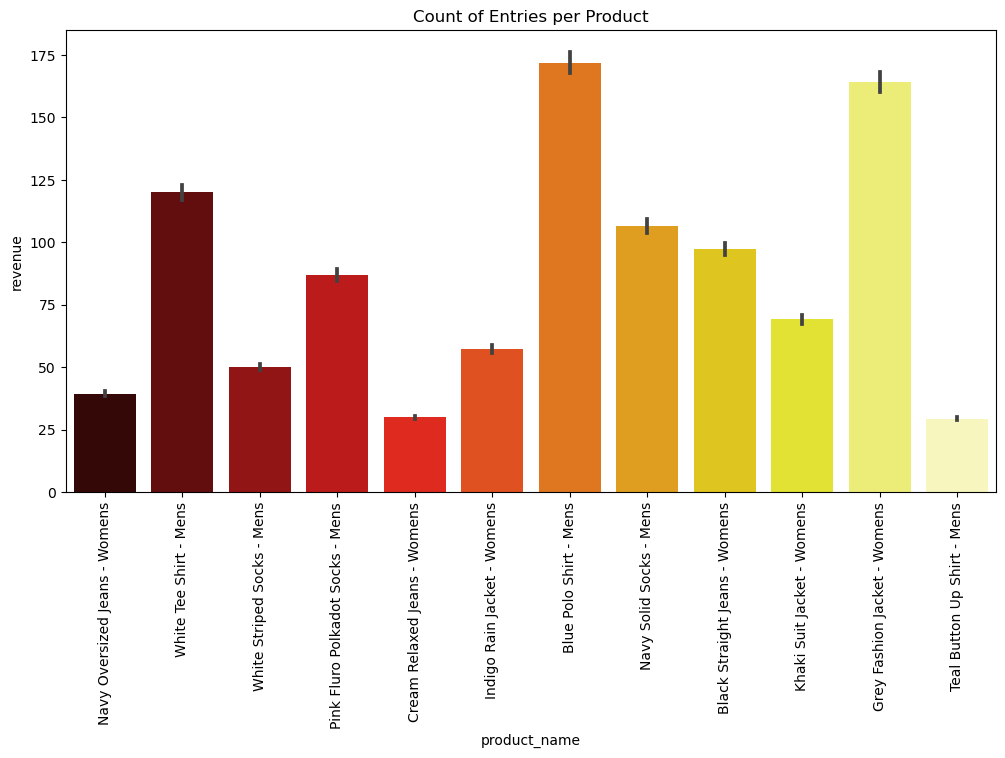

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='product_name',y='revenue',palette='hot')
plt.xticks(rotation=90)
plt.title('Count of Entries per Product')
plt.show()

## Insights

* **Revenue Contribution** :
* The height of each bar represents the revenue generated by a specific product, providing a visual comparison of their respective contributions.
* **Product Identification**:
* Products are identified on the x-axis, and their associated revenue is easily distinguishable, allowing for quick identification of top-performing or significant products.
* **Top Revenue Generators**:
* Products with taller bars indicate higher revenue, making it easy to identify the top revenue-generating products in the dataset.
   * **Blue Polo Shirt - Mens** top revenue generator in Men's category 
   * **Grey Fashion Jacket - Womens** top revenue generator in Women's category
   
      * **Teal Button Up Shirt - Mens** less  revenue generator in Men's Category
      * **Cream Relaxed Jeans - Womens** less revenue generator in Women's category
   
* **Visual Representation**:
* The rotation of product names on the x-axis (rotated by 90 degrees) ensures better readability, especially when dealing with a large number of products.
* **Strategic Insights**:
* Insights gained from this visualization can inform strategic decisions related to inventory management, marketing focus, and product prioritization based on revenue performance.
* **Data Exploration**:
* This chart serves as an initial exploration of the revenue distribution across products, providing a foundation for more in-depth analysis.

## 3. What was the total discount amount for all products?


In [40]:
 df.groupby('product_name')['discount'].sum()


product_name
Black Straight Jeans - Womens       15257
Blue Polo Shirt - Mens              15553
Cream Relaxed Jeans - Womens        15065
Grey Fashion Jacket - Womens        15500
Indigo Rain Jacket - Womens         15283
Khaki Suit Jacket - Womens          14669
Navy Oversized Jeans - Womens       15418
Navy Solid Socks - Mens             15646
Pink Fluro Polkadot Socks - Mens    14946
Teal Button Up Shirt - Mens         15003
White Striped Socks - Mens          14873
White Tee Shirt - Mens              15487
Name: discount, dtype: int64

In [197]:
 df.groupby('product_name')['discount'].sum().sum()

182700

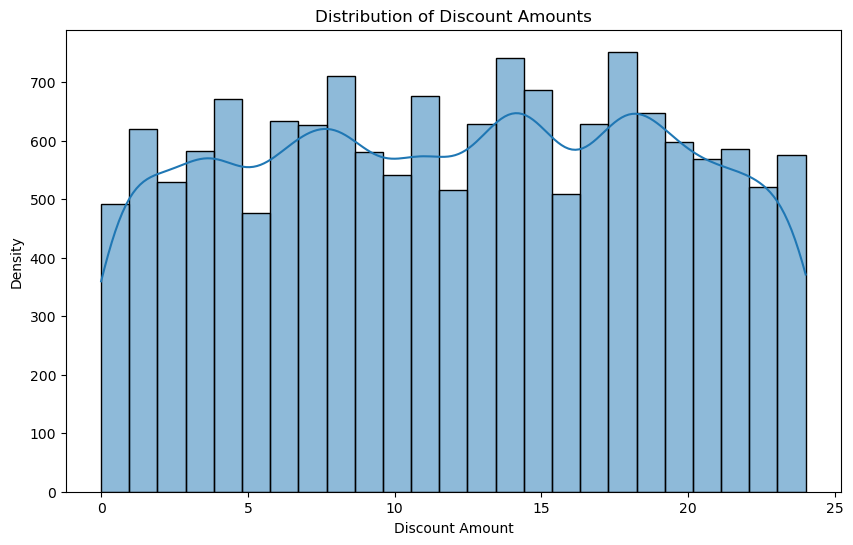

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discount'], fill=True,kde=True)
plt.title('Distribution of Discount Amounts')
plt.xlabel('Discount Amount')
plt.ylabel('Density')
plt.show()


## Insights 
* **Distribution Shape**:
* The histogram shows the frequency of different discount amounts, helping to identify the shape and central tendency of the distribution.
* **Density Curve (Kernel Density Estimate)**:
* The smooth curve overlaid on the histogram represents the kernel density estimate, providing a continuous view of the distribution's probability density.
* **Central Tendency**:
* Peaks and modes in the histogram indicate where discount amounts are most concentrated, offering insights into central tendencies.
* **Spread of Discounts**:
* The width and shape of the distribution reveal the spread and variability of discount amounts across transactions.
* **Outlier Detection**:
* Outliers or extreme values may be identified by observing the tails or rare peaks in the distribution.
* **Visual Clarity**:
* The combination of the histogram and density curve enhances the clarity of the discount amount distribution.

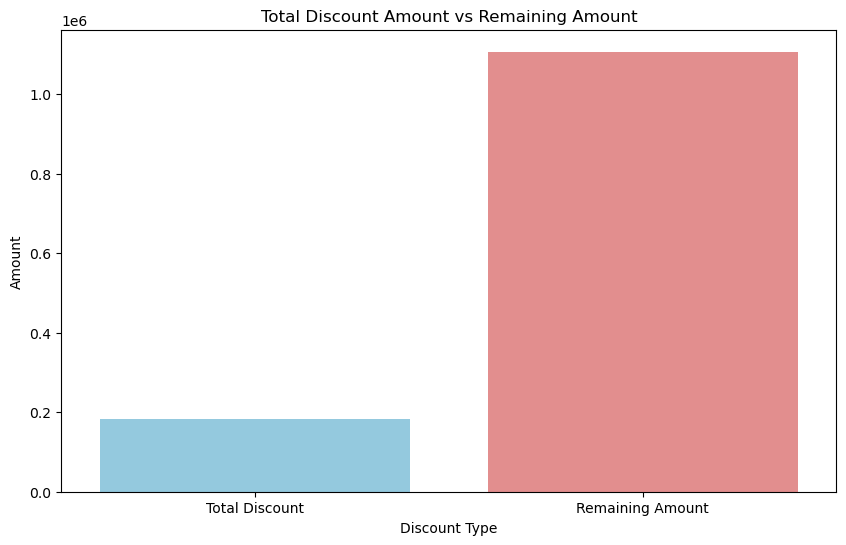

In [46]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount Type', y='Amount', data=data, palette=['skyblue', 'lightcoral'])
plt.title('Total Discount Amount vs Remaining Amount')
plt.show()


## Insights
* **Discount Types**:
* The x-axis represents different discount types, distinguishing between 'skyblue' and 'lightcoral' colors for visual clarity.
* **Total Discount Amount**:
* The height of each bar corresponds to the total discount amount associated with a specific discount type.
* **Remaining Amount**:
* The remaining amount not covered by discounts is implicitly represented by the height of the bars.
* **Comparison**:
* The chart allows for a quick visual comparison of the total discount amount for each type, aiding in identifying which types contribute more significantly to overall discounts.

# Transaction Analysis
## 1. How many unique transactions were there?

In [51]:
unique_transactions = sales['txn_id'].nunique()
print("Number of unique transactions:", unique_transactions)


Number of unique transactions: 2500


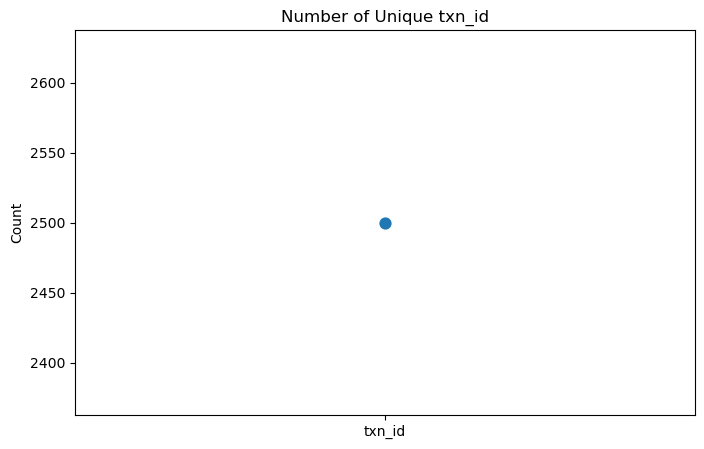

In [53]:
plt.figure(figsize=(8, 5))
sns.pointplot(x=['txn_id'], y=[df['txn_id'].nunique()], markers = ['o'])
plt.title('Number of Unique txn_id')
plt.ylabel('Count')
plt.show()

## Insights
* **Count of Unique Transactions**:
* The bar plot displays the count of unique txn_id values, representing the number of distinct transactions in the dataset.
* **Transaction Diversity**:
* The height of each bar indicates the frequency of occurrence for each unique transaction, providing insights into the diversity of transactions.
* **Visual Clarity**:
* The viridis color palette enhances visual clarity, making it easy to differentiate between the bars.

## 2. What is the average unique products purchased in each transaction?


In [54]:
average_unique_products_per_transaction = sales.groupby('txn_id')['prod_id'].nunique().mean()
print("Average unique products purchased in each transaction:", average_unique_products_per_transaction)


Average unique products purchased in each transaction: 6.038


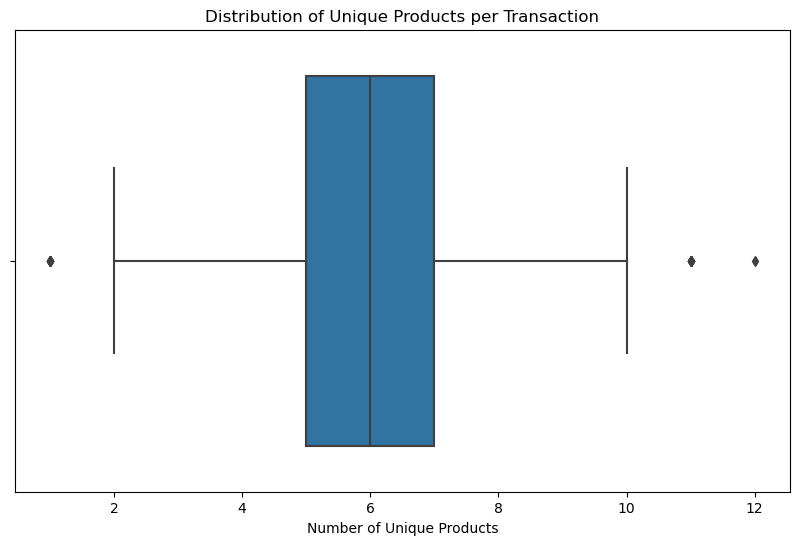

In [66]:
# Assuming sales is your DataFrame and 'prod_id' represents the products
average_unique_products_per_transaction = sales.groupby('txn_id')['prod_id'].nunique().mean()

# Create a DataFrame with the number of unique products per transaction
unique_products_per_transaction = sales.groupby('txn_id')['prod_id'].nunique().reset_index(name='unique_products')

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=unique_products_per_transaction['unique_products'])
plt.title('Distribution of Unique Products per Transaction')
plt.xlabel('Number of Unique Products')
plt.show()


## Insights
* **Central Tendency**:
* The median line in the box plot indicates the central tendency, representing the typical number of unique products per transaction.
* **Variability**:
* The width of the box and the length of the whiskers showcase the variability in the number of unique products, giving a sense of how diverse transactions are.
* **Outliers** :
* Individual points outside the whiskers represent potential outliers – transactions with an unusually high or low number of unique products.
* **Typical Range**:
* The interquartile range (IQR) provides a sense of the typical range of unique products per transaction, covering the middle 50% of the data.

## 3. What are the 25th, 50th and 75th percentile values for the revenue per transaction?


In [198]:
revenue_per_transaction = sales.groupby('txn_id')['revenue'].sum()

# Calculate percentiles
percentiles = revenue_per_transaction.describe(percentiles=[0.25, 0.5, 0.75])

# Extract specific percentiles
percentile_25th = percentiles['25%']
percentile_50th = percentiles['50%']  # Median
percentile_75th = percentiles['75%']

print("25th percentile value for revenue per transaction:", percentile_25th)
print("50th percentile (Median) value for revenue per transaction:", percentile_50th)
print("75th percentile value for revenue per transaction:", percentile_75th)


25th percentile value for revenue per transaction: 375.75
50th percentile (Median) value for revenue per transaction: 509.5
75th percentile value for revenue per transaction: 647.0


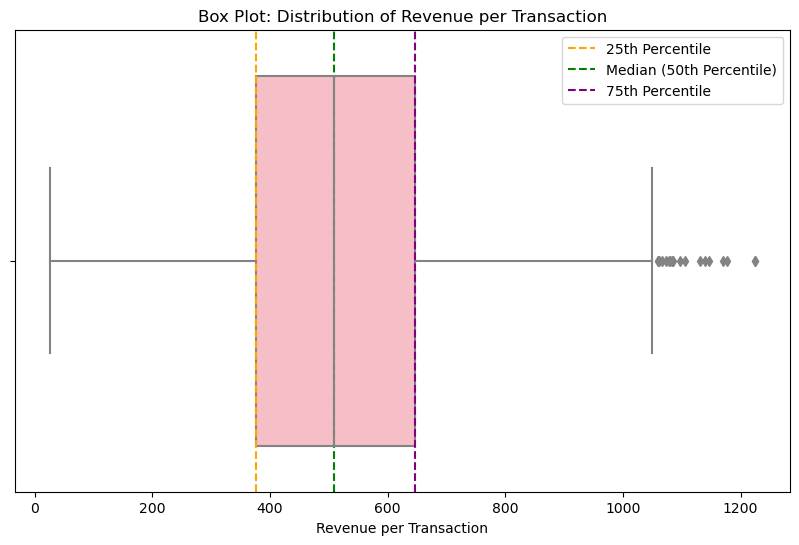

In [199]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=revenue_per_transaction, color='lightpink')
plt.title('Box Plot: Distribution of Revenue per Transaction')
plt.xlabel('Revenue per Transaction')

# Add percentiles as horizontal lines
plt.axvline(x=percentile_25th, color='orange', linestyle='--', label='25th Percentile')
plt.axvline(x=percentile_50th, color='green', linestyle='--', label='Median (50th Percentile)')
plt.axvline(x=percentile_75th, color='purple', linestyle='--', label='75th Percentile')

plt.legend()
plt.show()


## Insights 

* **Central Tendency**:
* The green line (median) indicates the midpoint of the revenue distribution. Half of the transactions fall below this line, and half above.
* **Quartiles**:
* The box itself represents the interquartile range (IQR), with the orange and purple lines denoting the 25th and 75th percentiles, respectively.
* The IQR encapsulates the middle 50% of the data, offering insights into the spread of the majority of transactions.
* **Outliers**:
* Any points beyond the "whiskers" of the box plot are potential outliers – transactions with revenue values significantly deviating from the central tendency.
   * too many data points outside the whiskers of the box plot, it suggests a distribution with a significant number of outliers. Outliers can impact the interpretation of the central tendency and spread of the data.
* **Spread of Data**:
* The length of the box and whiskers illustrates the overall spread and variability in revenue per transaction.
   * the box plot is not widely spread, it indicates that the interquartile range (IQR) is relatively narrow. The IQR represents the middle 50% of the data, and its width is influenced by the spread of values within that range.
* **Percentile Reference**:
* The horizontal lines provide reference points at the 25th, 50th (median), and 75th percentiles, aiding in the interpretation of the distribution.
* **Visual Clarity**:
* The box plot visually summarizes the distribution, making it easy to identify key percentiles and outliers.

## 4. What is the average discount value per transaction?

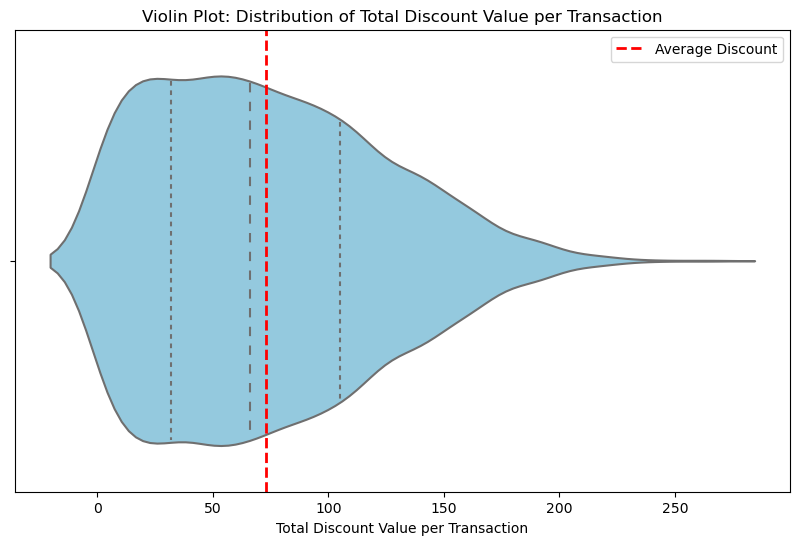

Average discount value per transaction: 73.08


In [71]:
average_discount_per_transaction = sales.groupby('txn_id')['discount'].sum().mean()

# Create a DataFrame with the discount value per transaction
discount_per_transaction = sales.groupby('txn_id')['discount'].sum().reset_index(name='total_discount')

# Plotting a violin plot with average line
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=discount_per_transaction['total_discount'], inner='quartile', color='skyblue')
plt.title('Violin Plot: Distribution of Total Discount Value per Transaction')
plt.xlabel('Total Discount Value per Transaction')

# Add average line to the plot
ax.axvline(x=average_discount_per_transaction, color='red', linestyle='dashed', linewidth=2, label='Average Discount')
plt.legend()

plt.show()

print("Average discount value per transaction:", average_discount_per_transaction)


## Insights 
* **Spread of Discounts**:
* The width of the plot at different discount values represents the density of transactions with those specific discount amounts.
   * The wider spread of the plot suggests a diverse range of discount values,
* **Central Tendency**:
* The central "quartile" region in the plot depicts where the majority of total discount values fall.
* **Average Discount Line**:
* The red dashed line signifies the average discount value per transaction, aiding in understanding the central tendency.
   * Average discount value per transaction: 73.08
* **Outlier Detection**:
* Observe the plot's tails to identify any outliers or extreme discount values in transactions.
   * **Long Tail**: The extended portion of the plot, especially on one side, suggests that there are transactions with discount values much higher than the average, indicating the presence of outliers.
* **Visual Insight**:
* The violin plot offers a visual summary of the distribution of discount values, providing a holistic view of transactional discount patterns.

## 5. What is the percentage split of all transactions for members vs non-members?


In [75]:
# Count the number of transactions for members and non-members
transaction_counts = sales['member'].value_counts()

# Calculate the percentage split
percentage_members = (transaction_counts['t'] / transaction_counts.sum()) * 100
percentage_non_members = (transaction_counts['f'] / transaction_counts.sum()) * 100

print("Percentage of transactions for members:", percentage_members)
print("Percentage of transactions for non-members:", percentage_non_members)


Percentage of transactions for members: 60.02649884067572
Percentage of transactions for non-members: 39.97350115932428


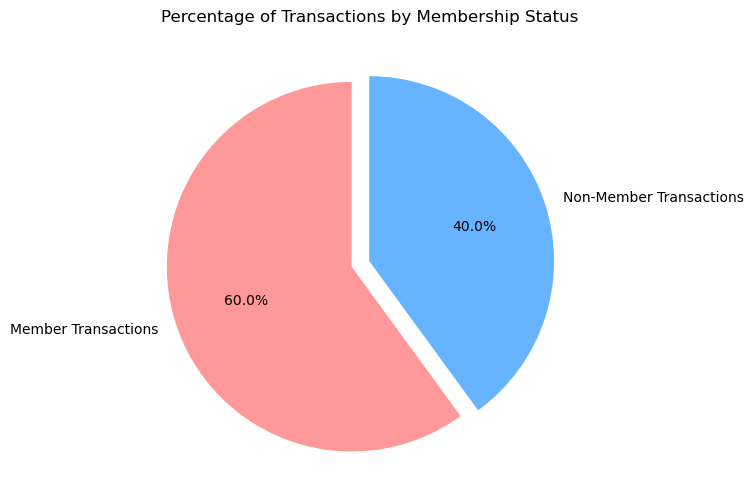

In [76]:
labels = ['Member Transactions', 'Non-Member Transactions']
sizes = [percentage_members,percentage_non_members ]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Transactions by Membership Status')
plt.show()

## Insights 

* **Member Transactions**:
* The red segment represents transactions made by members, contributing a significant portion to the overall distribution.
   * **Member's Transaction** is more compare to **Non members Transaction**
* **Non-Member Transactions**:
* The blue segment denotes transactions from non-members, providing insight into their share of the total transactions.
* **Percentage Breakdown**:
* Percentage labels on each segment quantify the proportion of transactions attributed to members and non-members.
* **Engagement Overview**:
* Assess the level of engagement from both members and non-members in terms of transaction participation.
* **Visual Emphasis**:
* The distinct colors and the exploded layout enhance visual emphasis, making it easy to distinguish between membership statuses.

## 6. What is the average revenue for member transactions and non-member transactions?


In [77]:
# Calculate the average revenue for member transactions
average_revenue_members = sales[sales['member'] == 't']['revenue'].mean()

# Calculate the average revenue for non-member transactions
average_revenue_non_members = sales[sales['member'] == 'f']['revenue'].mean()

print("Average revenue for member transactions:", average_revenue_members)
print("Average revenue for non-member transactions:", average_revenue_non_members)


Average revenue for member transactions: 49.74572343008498
Average revenue for non-member transactions: 48.43818362611866


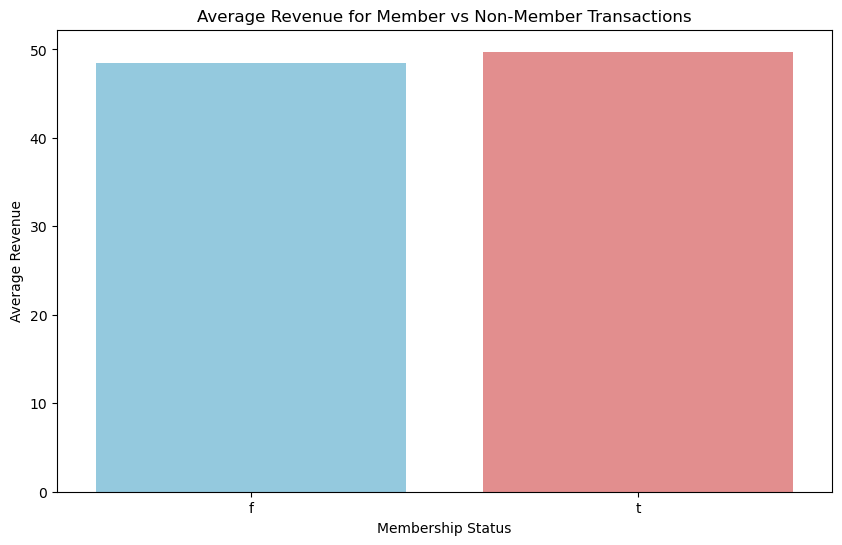

Average revenue for member transactions: 49.74572343008498
Average revenue for non-member transactions: 48.43818362611866


In [80]:

plt.figure(figsize=(10, 6))
sns.barplot(x=average_revenue_per_member.index, y=average_revenue_per_member.values, palette=['skyblue', 'lightcoral'])
plt.title('Average Revenue for Member vs Non-Member Transactions')
plt.xlabel('Membership Status')
plt.ylabel('Average Revenue')
plt.show()

print("Average revenue for member transactions:", average_revenue_per_member['t'])
print("Average revenue for non-member transactions:", average_revenue_per_member['f'])


## Insights 

* **Member Transactions**:
* The sky-blue bar represents the average revenue for transactions with members, providing insight into their spending patterns.
* **Non-Member Transactions**:
* The light-coral bar indicates the average revenue for transactions without membership, offering a comparison to member transactions.
* **Observations** :
* Observe which group, members or non-members, has a higher average revenue, providing insights into the customer base's value.
    * **Member's** Average revenue for member transactions is slightly more than **Non Member's** transaction
* **Strategic Considerations**:
* Tailor marketing and loyalty programs based on the spending behavior of members and non-members.
* **Visual Clarity**:
* The distinctive colors enhance visual clarity, making it easy to differentiate between member and non-member transactions.

# Product Analysis
## 1. What are the top 3 products by total revenue before discount?


In [97]:
# Calculate total revenue for each product
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get the top 3 products by total revenue
top_3_products = product_revenue.nlargest(3,'revenue')

print("Top 3 products by total revenue before discount:")
top_3_products


Top 3 products by total revenue before discount:


,product_name,revenue
1,Blue Polo Shirt - Mens,217683
3,Grey Fashion Jacket - Womens,209304
11,White Tee Shirt - Mens,152000


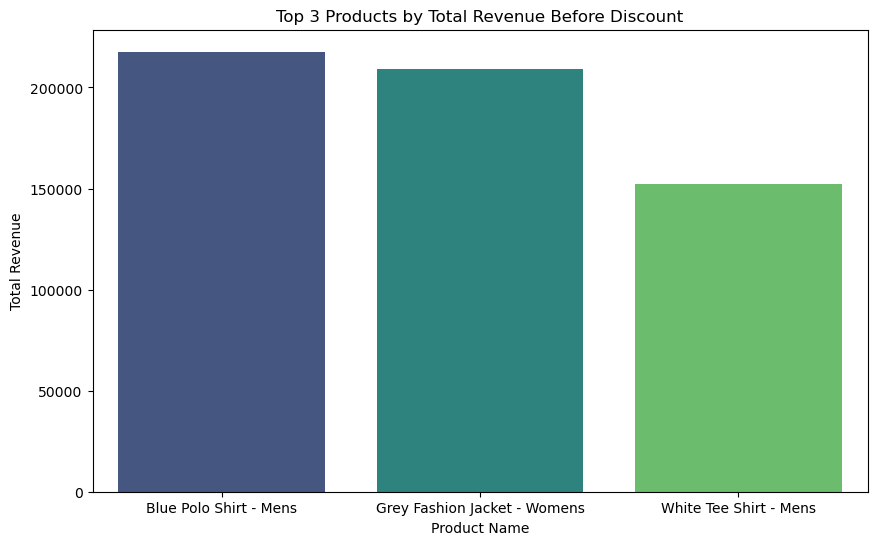

Top 3 products by total revenue before discount:
                    product_name  revenue
1         Blue Polo Shirt - Mens   217683
3   Grey Fashion Jacket - Womens   209304
11        White Tee Shirt - Mens   152000


In [98]:

plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='revenue', data=top_3_products, palette='viridis')
plt.title('Top 3 Products by Total Revenue Before Discount')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.show()

print("Top 3 products by total revenue before discount:")
print(top_3_products)


## Insights
* **Revenue Leaders**:
* Products with taller bars, such as [**Blue Polo Shirt - Mens**,**Grey Fashion Jacket - Womens**,**White Tee Shirt - Mens**  ], are the top revenue generators.
* **Performance Comparison**:
* Compare the heights of the bars to identify the relative contribution of each product to total revenue.
   * **Blue Polo Shirt - Men** has the highest revenue before discount
* **Strategic Focus**:
* Focus marketing efforts and inventory management on the identified top-performing products for maximum revenue impact.
* **Visual Emphasis**:
* The viridis color palette enhances visual appeal and differentiates the products effectively.

## 2. What is the total quantity, revenue and discount for each segment?


In [200]:

# Calculate total quantity, revenue, and discount for each segment
segment_data = df.groupby('segment_name').agg({
    'qty': 'sum',
    'revenue': 'sum',
    'discount': 'sum'
}).reset_index()

print("Total quantity, revenue, and discount for each segment:")
segment_data


Total quantity, revenue, and discount for each segment:


,segment_name,qty,revenue,discount
0,Jacket,11385,366983,45452
1,Jeans,11349,208350,45740
2,Shirt,11265,406143,46043
3,Socks,11217,307977,45465


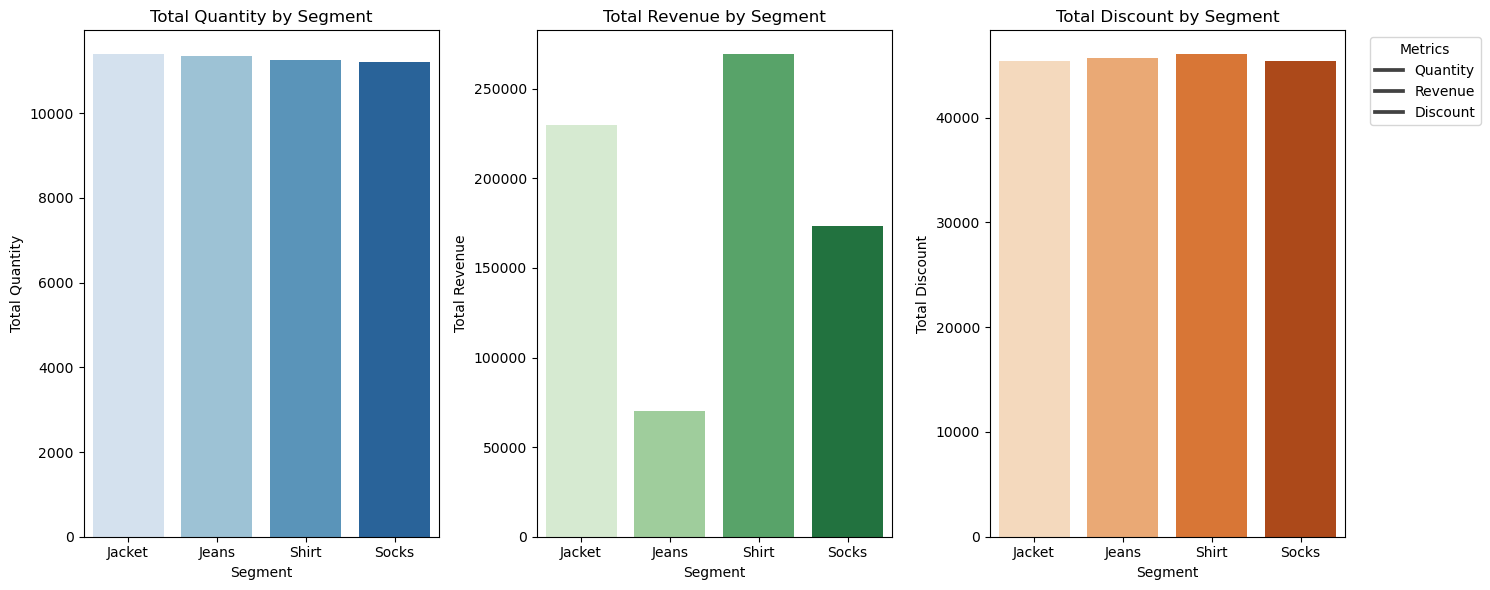

Total quantity, revenue, and discount for each segment:
  segment_name    qty  revenue  discount
0       Jacket  11385   229939     45452
1        Jeans  11349    70441     45740
2        Shirt  11265   269172     46043
3        Socks  11217   173470     45465


In [102]:
# Plotting bar plots for quantity, revenue, and discount
plt.figure(figsize=(15, 6))

# Bar plot for total quantity
plt.subplot(1, 3, 1)
sns.barplot(x='segment_name', y='qty', data=segment_data, palette='Blues')
plt.title('Total Quantity by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Quantity')

# Bar plot for total revenue
plt.subplot(1, 3, 2)
sns.barplot(x='segment_name', y='revenue', data=segment_data, palette='Greens')
plt.title('Total Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')

# Bar plot for total discount
plt.subplot(1, 3, 3)
sns.barplot(x='segment_name', y='discount', data=segment_data, palette='Oranges')
plt.title('Total Discount by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Discount')

# Adding legends
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Quantity', 'Revenue', 'Discount'])

plt.tight_layout()
plt.show()

print("Total quantity, revenue, and discount for each segment:")
print(segment_data)


## Insights
* **Total Quantity by Segment**:
* The first plot (leftmost) illustrates the total quantity sold within each segment.
* Observe variations in bar heights to identify segments with higher or lower quantities.
  * **Jacket** highest quantity sold 
  * **Socks** lowest quantity sold 
* **Total Revenue by Segment**:
* The second plot (middle) showcases the total revenue generated in each segment.
* Taller bars indicate segments contributing more to the overall revenue.
   * **Shirt** contributing more revenue 
   * **Jeans** contributing less revenue
* **Total Discount by Segment**:
* The third plot (rightmost) displays the total discount offered within each segment.
* Compare bar heights to identify segments with higher or lower discount values.
    * **Shirt** has highest discount
    * **Jacket** has lowest discount
* **Segment Comparisons**:
* Use the legends to understand the metrics represented in each plot and compare segment performances across quantity, revenue, and discount.
* **Visual Clarity**:
* The side-by-side presentation enables a quick and clear comparison of key metrics across different segments.

## 3.What is the top selling product for each segment?

In [112]:
product_segment = df.groupby(['segment_id', 'segment_name','product_id','product_name'])['qty'].sum().reset_index()
top_sales_index = product_segment.groupby(['segment_id',
                                           'segment_name','product_name'])['qty'].idxmax()
top_sales = product_segment.loc[top_sales_index]
top_sales.sort_values(by=['segment_id'], inplace=True)
top_sales

,segment_id,segment_name,product_id,product_name,qty
2,3,Jeans,e83aa3,Black Straight Jeans - Womens,3786
1,3,Jeans,e31d39,Cream Relaxed Jeans - Womens,3707
0,3,Jeans,c4a632,Navy Oversized Jeans - Womens,3856
4,4,Jacket,9ec847,Grey Fashion Jacket - Womens,3876
3,4,Jacket,72f5d4,Indigo Rain Jacket - Womens,3757
5,4,Jacket,d5e9a6,Khaki Suit Jacket - Womens,3752
6,5,Shirt,2a2353,Blue Polo Shirt - Mens,3819
8,5,Shirt,c8d436,Teal Button Up Shirt - Mens,3646
7,5,Shirt,5d267b,White Tee Shirt - Mens,3800
11,6,Socks,f084eb,Navy Solid Socks - Mens,3792


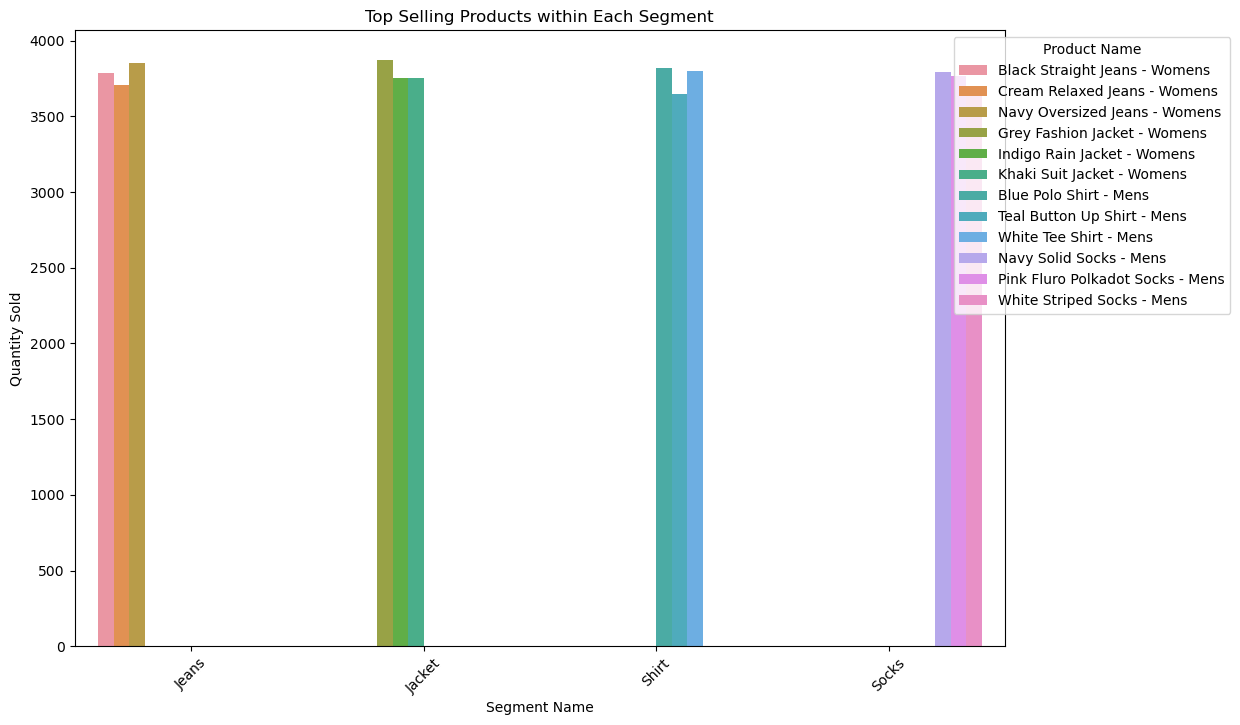

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sales, x='segment_name', y='qty', hue='product_name')
plt.xlabel('Segment Name')
plt.ylabel('Quantity Sold')
plt.title('Top Selling Products within Each Segment')
plt.legend(title='Product Name', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.show()

## Insights
* **Segment Overview**:
* Segments are represented on the x-axis, providing an overview of their respective total quantities.
* **Product Contribution**:
* Each bar within a segment represents the quantity sold.
* Different colors within each bar denote individual top-selling products.
* **Top Product Identification**:
* Identify top-selling products within each segment by evaluating the taller bars and their associated colors.
  * **Grey Fashion Jacket - Womens** top selling product in Women's Category 
  * **Blue Polo Shirt - Mens** top selling product in Men's category 
* **Segment Comparisons**:
* Easily compare the quantity sold across different segments and recognize the impact of specific products.
* **Visual Clarity**:
* The legend on the upper right highlights the corresponding product names, enhancing visual clarity.

## 4. What is the total quantity, revenue and discount for each category?

In [201]:
# Calculate total quantity, revenue, and discount for each category
category_data = df.groupby('category_name').agg({
    'qty': 'sum',
    'revenue': 'sum',
    'discount': 'sum'
}).reset_index()

print("Total quantity, revenue, and discount for each category:")
category_data


Total quantity, revenue, and discount for each category:


,category_name,qty,revenue,discount
0,Mens,22482,714120,91508
1,Womens,22734,575333,91192


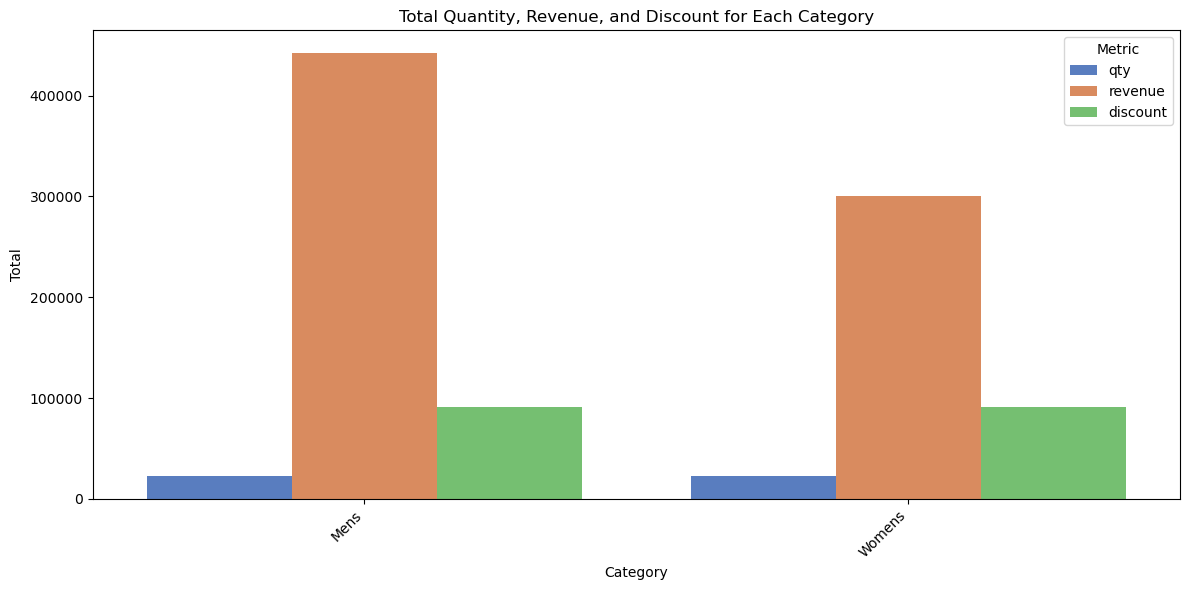

Total quantity, revenue, and discount for each category:
  category_name    qty  revenue  discount
0          Mens  22482   442642     91508
1        Womens  22734   300380     91192


In [160]:
# Melt the DataFrame to reshape it for a grouped bar plot
melted_data = category_data.melt(id_vars='category_name', var_name='metric', value_name='total')

# Plotting a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='total', hue='metric', data=melted_data, palette='muted')

plt.title('Total Quantity, Revenue, and Discount for Each Category')
plt.xlabel('Category')
plt.ylabel('Total')
plt.legend(title='Metric')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Total quantity, revenue, and discount for each category:")
print(category_data)


## Insights
* **Category Performance**:
* Observe the heights of the bars within each category to gauge the relative performance of quantity, revenue, and discount.
* **Top Quantity Categories**:
* Identify categories with taller blue bars to pinpoint those with the highest total quantities.
  * **Women's Category** has highest Selling quantity than **Men's Category**
* **Revenue Impact**:
* Compare the orange bars to understand which categories contribute the most to total revenue.
   * **Men's Category** has highest revenue than **Women's Category**
* **Discount Distribution**:
* Evaluate the green bars to identify categories with significant discount values.
   * **Men's Category** has more discount than **Women's Category**
* **Relative Comparisons**:
* Side-by-side placement enables easy comparison of each category's performance across all three metrics.

## 5. What is the top selling product for each category?

In [120]:
category_product = df.groupby(['category_id', 
            'category_name','product_id','product_name'])['qty'].sum().reset_index()
category_product

,category_id,category_name,product_id,product_name,qty
0,1,Womens,72f5d4,Indigo Rain Jacket - Womens,3757
1,1,Womens,9ec847,Grey Fashion Jacket - Womens,3876
2,1,Womens,c4a632,Navy Oversized Jeans - Womens,3856
3,1,Womens,d5e9a6,Khaki Suit Jacket - Womens,3752
4,1,Womens,e31d39,Cream Relaxed Jeans - Womens,3707
5,1,Womens,e83aa3,Black Straight Jeans - Womens,3786
6,2,Mens,2a2353,Blue Polo Shirt - Mens,3819
7,2,Mens,2feb6b,Pink Fluro Polkadot Socks - Mens,3770
8,2,Mens,5d267b,White Tee Shirt - Mens,3800
9,2,Mens,b9a74d,White Striped Socks - Mens,3655


In [121]:
top_category_index = category_product.groupby(['category_id', 'category_name'])['qty'].idxmax()
top_category = category_product.loc[top_category_index]
top_category

,category_id,category_name,product_id,product_name,qty
1,1,Womens,9ec847,Grey Fashion Jacket - Womens,3876
6,2,Mens,2a2353,Blue Polo Shirt - Mens,3819


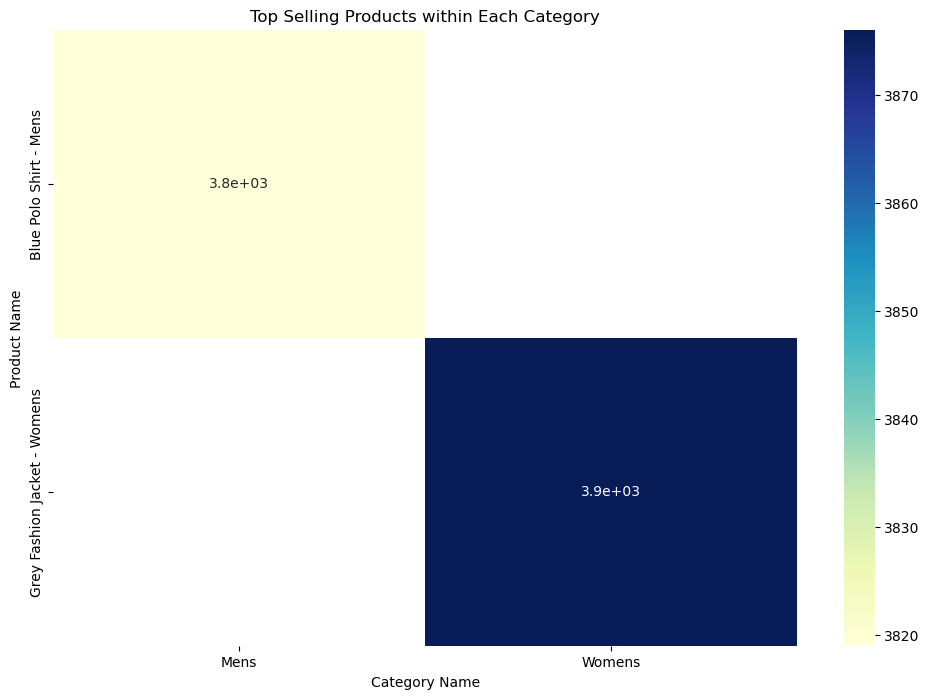

In [122]:
top_category_pivot = top_category.pivot(index='product_name', 
                                        columns='category_name', values='qty')
plt.figure(figsize=(12, 8))
sns.heatmap(top_category_pivot, cmap='YlGnBu', annot=True)
plt.xlabel('Category Name')
plt.ylabel('Product Name')
plt.title('Top Selling Products within Each Category')
plt.show()


## Insights
* **Product Distribution**:
* Rows represent individual products, while columns represent different categories.
* **Color Intensity**:
* Darker shades indicate higher quantities, highlighting the popularity of specific products in each category.
* **Category Comparison**:
* Compare the distribution of top-selling products across various categories.
   * **Grey Fashion Jacket - Womens** top-selling product in Women's Category 
   * **Blue Polo Shirt - Mens** top selling product in Men's category 
* **Product Performance**:
* Identify products with consistently high quantities across multiple categories.
* **Visual Clarity**:
* The heatmap provides a clear and immediate overview of the top-selling products' distribution within each category.

## 6. What is the percentage split of revenue by product for each segment?


In [133]:
segment_product = df.groupby(['segment_id','segment_name', 'product_id','product_name'])['revenue'].sum()

total_segment_product = df.groupby(['segment_id', 
                                        'segment_name'])['revenue'].sum()
split = segment_product / total_segment_product * 100
split

segment_id  segment_name  product_id  product_name                    
3           Jeans         c4a632      Navy Oversized Jeans - Womens       24.059515
                          e31d39      Cream Relaxed Jeans - Womens        17.792177
                          e83aa3      Black Straight Jeans - Womens       58.148308
4           Jacket        72f5d4      Indigo Rain Jacket - Womens         19.451310
                          9ec847      Grey Fashion Jacket - Womens        57.033705
                          d5e9a6      Khaki Suit Jacket - Womens          23.514986
5           Shirt         2a2353      Blue Polo Shirt - Mens              53.597624
                          5d267b      White Tee Shirt - Mens              37.425242
                          c8d436      Teal Button Up Shirt - Mens          8.977134
6           Socks         2feb6b      Pink Fluro Polkadot Socks - Mens    35.499404
                          b9a74d      White Striped Socks - Mens          20.175208
     

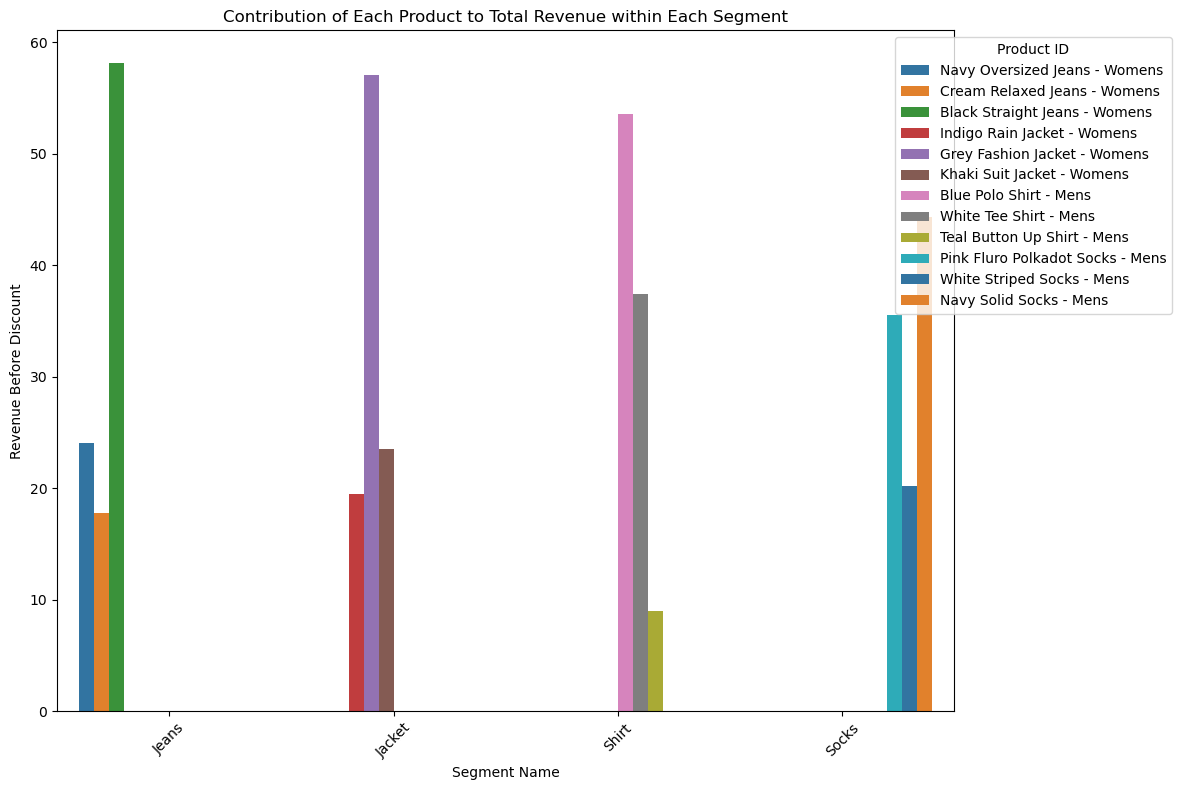

In [135]:
split_df = split.reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=split_df, x='segment_name', y='revenue', 
            hue='product_name', palette='tab10')
plt.xlabel('Segment Name')
plt.ylabel('Revenue Before Discount')
plt.title('Contribution of Each Product to Total Revenue within Each Segment')
plt.legend(title='Product ID', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights 
* **Segment Dominance**: Each segment is represented on the x-axis, showcasing its overall revenue.
* **Product Contribution**: For each segment, individual bars are split by color, indicating the contribution of different products.
* **Top Contributors**: Products with taller segments within each bar make more significant contributions to revenue.
   * **Grey Fashion Jacket - Womens** more significant to revenue 
   * **Teal Button Up Shirt - Mens** very less significant to revenue
* **Segment Variation**: Variation in bar heights across segments reveals distinct product performance in different segments.
* **Color Differentiation**: Each product is uniquely identified by color, aiding in easy comparison.

## 7. What is the percentage split of revenue by segment for each category?


In [138]:

# Calculate total revenue for each segment in each category
segment_revenue_by_category = df.groupby(['category_name', 'segment_name'])['revenue'].sum().reset_index()

# Calculate the percentage split of revenue by segment for each category
segment_revenue_by_category['percentage'] = segment_revenue_by_category.groupby('category_name')['revenue'].transform(lambda x: (x / x.sum()) * 100)

print("Percentage split of revenue by segment for each category:")
segment_revenue_by_category


Percentage split of revenue by segment for each category:


,category_name,segment_name,revenue,percentage
0,Mens,Shirt,406143,56.873215
1,Mens,Socks,307977,43.126785
2,Womens,Jacket,366983,63.786190
3,Womens,Jeans,208350,36.213810


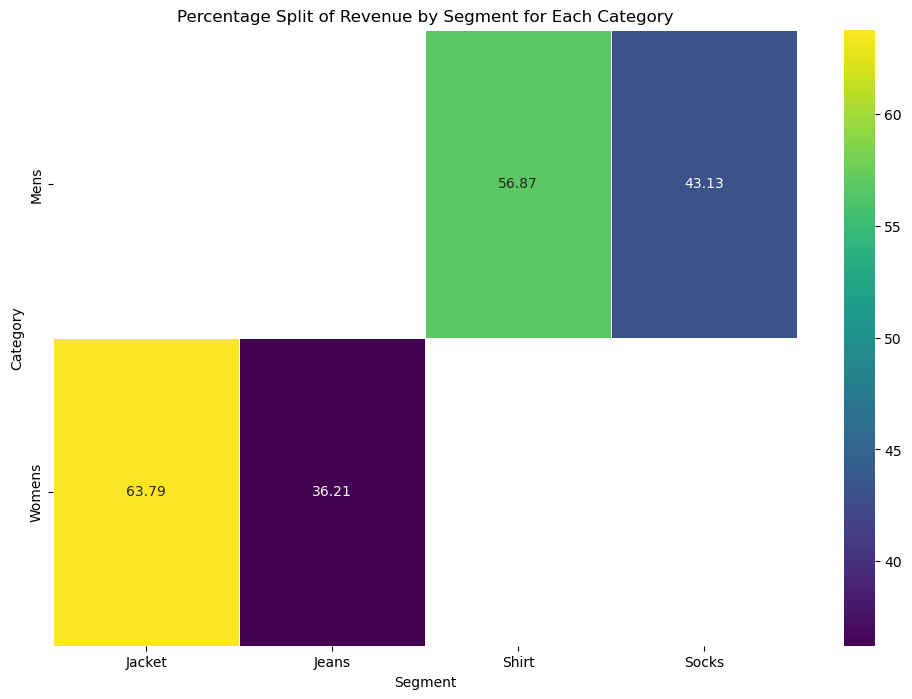

Percentage split of revenue by segment for each category:
  category_name segment_name  revenue  percentage
0          Mens        Shirt   406143   56.873215
1          Mens        Socks   307977   43.126785
2        Womens       Jacket   366983   63.786190
3        Womens        Jeans   208350   36.213810


In [141]:
heatmap_data = segment_revenue_by_category.pivot(index='category_name', columns='segment_name', values='percentage')

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Percentage Split of Revenue by Segment for Each Category')
plt.xlabel('Segment')
plt.ylabel('Category')
plt.show()

print("Percentage split of revenue by segment for each category:")
print(segment_revenue_by_category)


## Insights
* Category Strengths: Darker shades highlight powerful segments within each category.
* **Women's Jacket** more revenue than **Women,s Jeans**
* **Men's Shirt** has more revenue than **Men's sock**
* Segment Impact: Easily spot which segments contribute most to a category's revenue.
* Visual Insight: The heatmap's color intensity offers a straightforward view of revenue patterns.
* Comparative Analysis: Quickly compare segment contributions across categories for strategic insights.

## 8. What is the percentage split of total revenue by category?

In [142]:
# Calculate total revenue for each category
category_total_revenue = df.groupby('category_name')['revenue'].sum().reset_index()

# Calculate the percentage split of total revenue by category
category_total_revenue['percentage'] = (category_total_revenue['revenue'] / category_total_revenue['revenue'].sum()) * 100

print("Percentage split of total revenue by category:")
category_total_revenue


Percentage split of total revenue by category:


,category_name,revenue,percentage
0,Mens,714120,55.381623
1,Womens,575333,44.618377


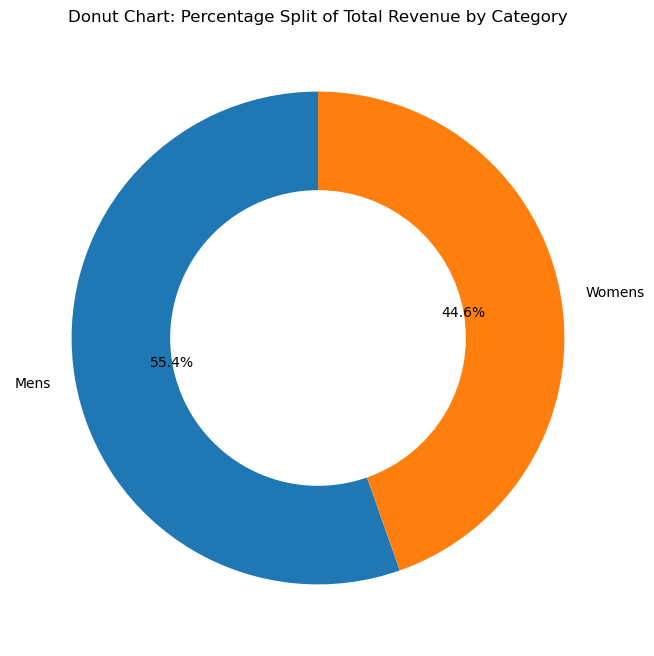

Percentage split of total revenue by category:
  category_name  revenue  percentage
0          Mens   714120   55.381623
1        Womens   575333   44.618377


In [144]:
# Plotting a donut chart
plt.figure(figsize=(8, 8))
plt.pie(category_total_revenue['percentage'], labels=category_total_revenue['category_name'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Donut Chart: Percentage Split of Total Revenue by Category')
plt.gca().add_artist(plt.Circle((0,0),0.3,fc='white'))  # Adding a white circle to create a donut chart
plt.show()

print("Percentage split of total revenue by category:")
print(category_total_revenue)


## Insights
* **Men's Category**, contribute significantly to revenue.
* Some categories have a balanced revenue distribution, indicating product diversity.
* Prioritize strategies and investments in top-performing categories for optimal results.
* Explore growth opportunities in smaller sections to enhance overall contributions.
* The chart's simplicity with a white center allows quick understanding of revenue patterns.

## 9. What is the total transaction “penetration” for each product? (hint: penetration = number of transactions where at least one quantity of a product was purchased divided by total number of transactions)


In [152]:
product_penetration = df.groupby(['product_id',
                                'product_name'])['txn_id'].nunique().reset_index(name = 'penetration')

total_trans = df['txn_id'].nunique()
product_penetration['product_penetration'] = product_penetration['penetration'] / total_trans*100
print("Total transaction penetration for each product:")
product_penetration[['product_id', 'product_name','penetration','product_penetration']]


Total transaction penetration for each product:


,product_id,product_name,penetration,product_penetration
0,2a2353,Blue Polo Shirt - Mens,1268,50.72
1,2feb6b,Pink Fluro Polkadot Socks - Mens,1258,50.32
2,5d267b,White Tee Shirt - Mens,1268,50.72
3,72f5d4,Indigo Rain Jacket - Womens,1250,50.00
4,9ec847,Grey Fashion Jacket - Womens,1275,51.00
5,b9a74d,White Striped Socks - Mens,1243,49.72
6,c4a632,Navy Oversized Jeans - Womens,1274,50.96
7,c8d436,Teal Button Up Shirt - Mens,1242,49.68
8,d5e9a6,Khaki Suit Jacket - Womens,1247,49.88
9,e31d39,Cream Relaxed Jeans - Womens,1243,49.72


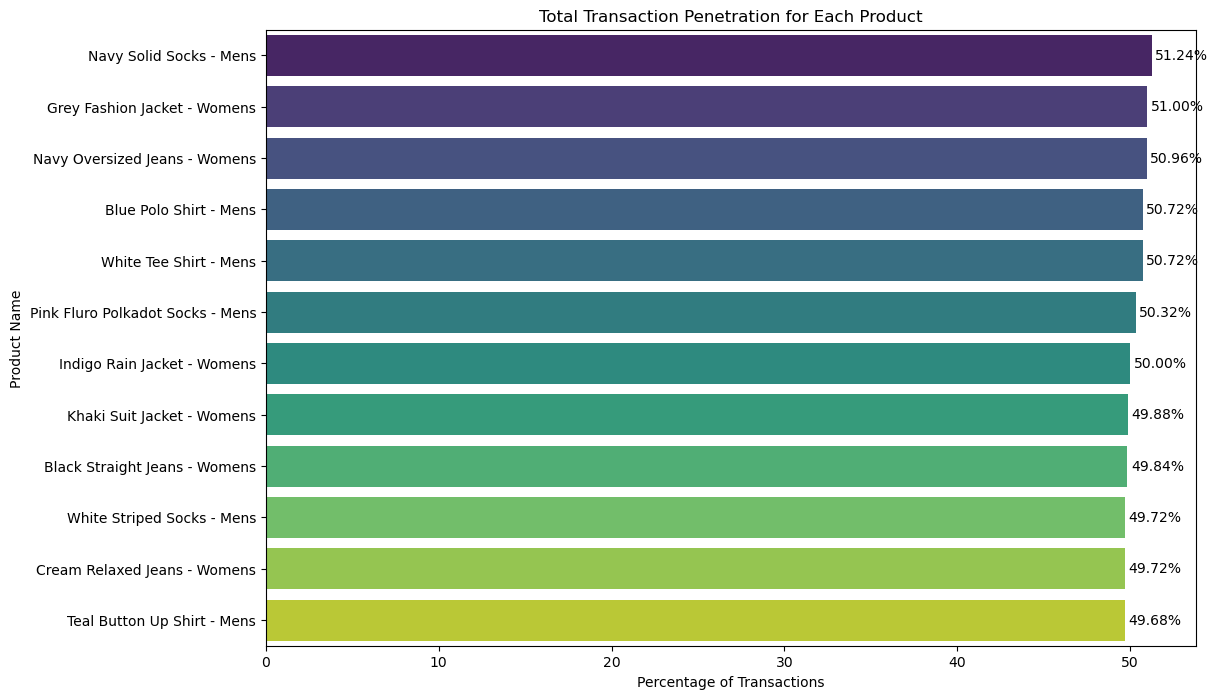

In [154]:
# Sorting the DataFrame by penetration for better visualization
product_penetration = product_penetration.sort_values(by='penetration', ascending=False)

# Plotting a horizontal bar plot with custom coloring
plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(product_penetration))
sns.barplot(x='product_penetration', y='product_name', data=product_penetration, palette=colors)

# Adding data labels
for index, value in enumerate(product_penetration['product_penetration']):
    plt.text(value + 0.2, index, f'{value:.2f}%', va='center', fontsize=10, color='black')

plt.title('Total Transaction Penetration for Each Product')
plt.xlabel('Percentage of Transactions')
plt.ylabel('Product Name')
plt.show()



## Insights: 
* The plot shows the popularity of products based on the percentage of total transactions, with longer bars indicating higher popularity.
* Top bars represent products contributing significantly to overall sales, and a more uniform distribution suggests a diverse range of products driving transactions. 
* Shorter bars highlight potential growth areas or aspects needing attention for strategic focus. 
* Data labels enhance clarity by providing precise percentage information on each product's contribution to total transactions.
* **Navy Solid Socks - Mens** has higher popularity  with most transactions 
